This file builds on the Tornado_Alley_vis file that is in Version 1 of this project.

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import data
csv_path = Path("../../Resources/us_tornado_data_complete.csv")
tornadoes_df = pd.read_csv(csv_path, encoding="UTF-8")
tornadoes_df.head()

,index_name,Year,Date,State,Rating,Injuries,Death,Start_Lat,Start_Lon,Width
0,0,1950,1950-01-03,IL,3,3,0,39.10,-89.30,130
1,1,1950,1950-01-03,MO,3,3,0,38.77,-90.22,150
2,2,1950,1950-01-03,OH,1,1,0,40.88,-84.58,10
3,3,1950,1950-01-13,AR,3,1,1,34.40,-94.37,17
4,4,1950,1950-01-25,IL,2,0,0,41.17,-87.33,100


In [3]:
#Check data types
tornadoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70428 entries, 0 to 70427
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index_name  70428 non-null  int64  
 1   Year        70428 non-null  int64  
 2   Date        70428 non-null  object 
 3   State       70428 non-null  object 
 4   Rating      70428 non-null  object 
 5   Injuries    70428 non-null  int64  
 6   Death       70428 non-null  int64  
 7   Start_Lat   70428 non-null  float64
 8   Start_Lon   70428 non-null  float64
 9   Width       70428 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 5.4+ MB


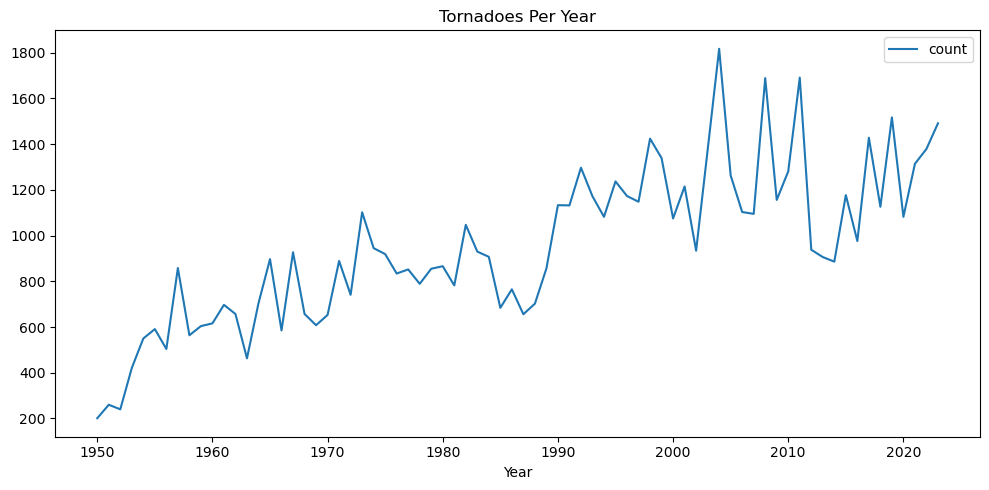

In [10]:
# Create a visual of tornadoes per year
a = tornadoes_df["Year"].value_counts()
b = pd.DataFrame(a)
Tornadoes_per_year = b.sort_values("Year")


year_count_fig = Tornadoes_per_year.plot(kind="line", figsize=(10, 5))
plt.title("Tornadoes Per Year")
plt.tight_layout()

In [11]:
# Export figure with yearly counts
year_count_fig.figure.savefig("Tornadoes_Per_Year.png")

In [5]:
#Identify number of tornadoes of Unknown intensity that have injuries
tornadoes_df.loc[tornadoes_df["Rating"] == "U"].loc[tornadoes_df["Injuries"] != 0]

,index_name,Year,Date,State,Rating,Injuries,Death,Start_Lat,Start_Lon,Width


No tornadoes that have a rating of Unknown intensity were identified as having injuries.

/Users/downleft/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


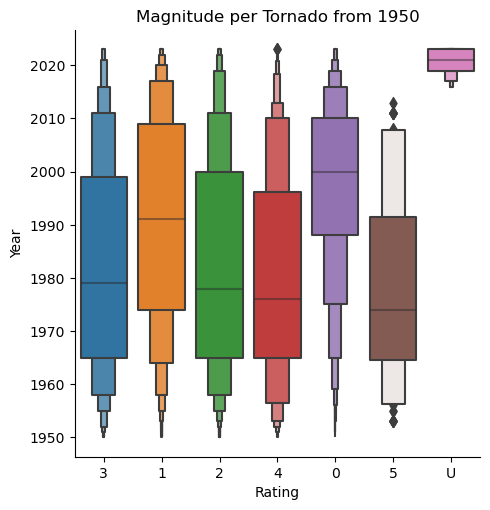

In [6]:
# Create boxplot to view distribution of each rating
sns.catplot(data=tornadoes_df, x="Rating", y="Year", kind="boxen").set(title="Magnitude per Tornado from 1950")

In [7]:
# Create dataframe that converts Unknown rating to EF0
unknown_0_df = tornadoes_df.copy()
unknown_0_df["Rating"] = unknown_0_df["Rating"].replace({"U": "0"})

# Convert Rating column to Int to create line graph
unknown_0_df["Rating"] = unknown_0_df["Rating"].astype("int")

# Confirm Rating column is now in Int
unknown_0_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70428 entries, 0 to 70427
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index_name  70428 non-null  int64  
 1   Year        70428 non-null  int64  
 2   Date        70428 non-null  object 
 3   State       70428 non-null  object 
 4   Rating      70428 non-null  int64  
 5   Injuries    70428 non-null  int64  
 6   Death       70428 non-null  int64  
 7   Start_Lat   70428 non-null  float64
 8   Start_Lon   70428 non-null  float64
 9   Width       70428 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 5.4+ MB


In [8]:
unknown_0_df["Rating"].unique()

array([3, 1, 2, 4, 0, 5])

/Users/downleft/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


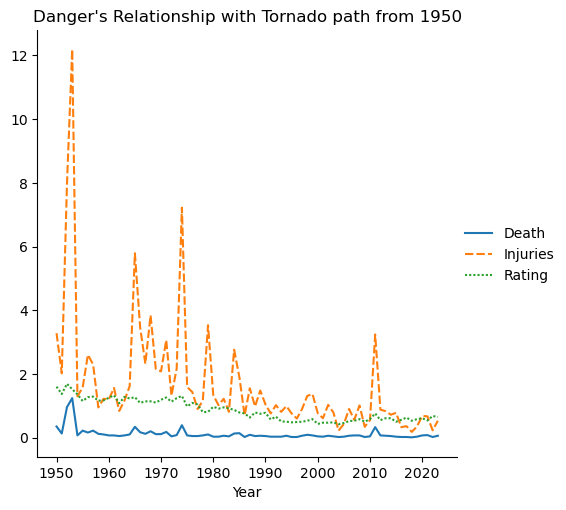

In [24]:
R = unknown_0_df.groupby("Year")["Rating"].mean()
Rdfr = round(R, 2)
Rdf = pd.DataFrame(Rdfr)

I = unknown_0_df.groupby("Year")["Injuries"].mean()
Idfr = round(I, 2)
Idf = pd.DataFrame(Idfr)

D = unknown_0_df.groupby("Year")["Death"].mean()
Ddfr = round(D, 2)
Ddf = pd.DataFrame(Ddfr)

Merge1 = pd.merge(Ddf, Idf, on="Year")
Merged_Danger_df = pd.merge(Merge1, Rdf, on="Year")

unknown_0_plot = sns.relplot(data=Merged_Danger_df, kind="line").set(title="Danger's Relationship with Tornado path from 1950")

In [10]:
# Create dataframe that removes tornadoes of Unknown rating
no_unknown_df = tornadoes_df.copy()
no_unknown_df = no_unknown_df.loc[no_unknown_df["Rating"] != "U"]

# Convert Rating column to Int to create line graph
no_unknown_df["Rating"] = no_unknown_df["Rating"].astype("int")

# Confirm Rating column is now in Int
no_unknown_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69389 entries, 0 to 70426
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index_name  69389 non-null  int64  
 1   Year        69389 non-null  int64  
 2   Date        69389 non-null  object 
 3   State       69389 non-null  object 
 4   Rating      69389 non-null  int64  
 5   Injuries    69389 non-null  int64  
 6   Death       69389 non-null  int64  
 7   Start_Lat   69389 non-null  float64
 8   Start_Lon   69389 non-null  float64
 9   Width       69389 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 5.8+ MB


In [11]:
# Compare value counts to determine how many tornadoes are removed
unknown_0_df["Rating"].value_counts()

Rating
0    33412
1    23936
2     9832
3     2601
4      588
5       59
Name: count, dtype: int64

In [12]:
# Compare value counts to determine how many tornadoes are removed
no_unknown_df["Rating"].value_counts()

Rating
0    32373
1    23936
2     9832
3     2601
4      588
5       59
Name: count, dtype: int64

/Users/downleft/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


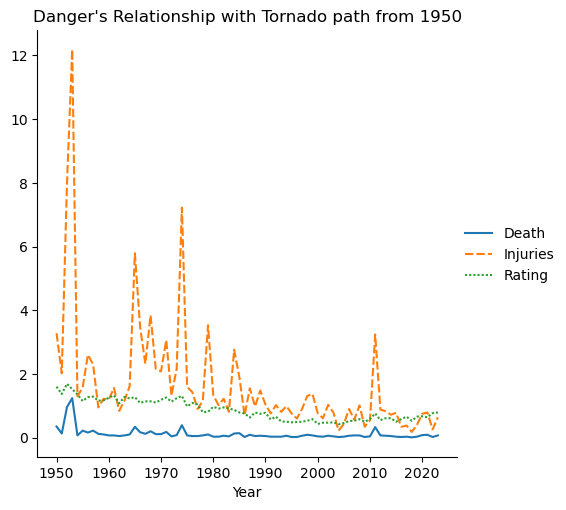

In [13]:
R2 = no_unknown_df.groupby("Year")["Rating"].mean()
R2dfr = round(R2, 2)
R2df = pd.DataFrame(R2dfr)

I2 = no_unknown_df.groupby("Year")["Injuries"].mean()
I2dfr = round(I2, 2)
I2df = pd.DataFrame(I2dfr)

D2 = no_unknown_df.groupby("Year")["Death"].mean()
D2dfr = round(D2, 2)
D2df = pd.DataFrame(D2dfr)

Merge2 = pd.merge(D2df, I2df, on="Year")
Merged_Danger2_df = pd.merge(Merge2, R2df, on="Year")

sns.relplot(data=Merged_Danger2_df, kind="line").set(title="Danger's Relationship with Tornado path from 1950")

In [25]:
# Save Dangers line graph where unknown tornadoes are treated as EF0
unknown_0_plot.savefig("Dangers_Relationship_Line_Graph")